This hackathon will try to address the challenges faced by taxi operators in quoting the right fare to customers before starting the trip. However, the details are shared with taxi drivers or operators related to the trip, they find it difficult to quote the right fare because of uncertainties and calculation complexities. 

The same issue is faced by passengers as well because of inaccurate or irrelevant fares quoted. To find a solution for this, this hackathon provides a historical dataset to participants that includes records of taxi trip details and fares of those trips. 

**Using this dataset, the participants need to build machine learning models for predicting the trip fare based on the given other useful features of the trip.**

* Distance
* Time of Travel
* Duration of Travel
* Tolls
* Location
* Type of Car
* Price
* Day or Night
* Demand and Supply
* Rating of the Driver
* Payment Type - may or may not work..
* Working Day or Weekend
* Cab Sharing/Pooled Car
* Tip shall have an impact...


In [2]:
# Import the Libraries and the Data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("~/Downloads/Taxi Trip/train.csv")
test = pd.read_csv("~/Downloads/Taxi Trip/test.csv")
submission = pd.read_csv("~/Downloads/Taxi Trip/submission.csv")

In [4]:
train.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,2131.0,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,2377.0,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,1286.0,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,2586.0,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,1575.0,23.80


In [111]:
# Combine the Dataset

combined = pd.concat([train, test], ignore_index = True)

In [7]:
train.shape, test.shape, combined.shape

((35000, 20), (15000, 19), (50000, 20))

### Univariate Analysis

In [11]:
# List of the Numerical Vars...

#combined.select_dtypes(include = np.number).columns

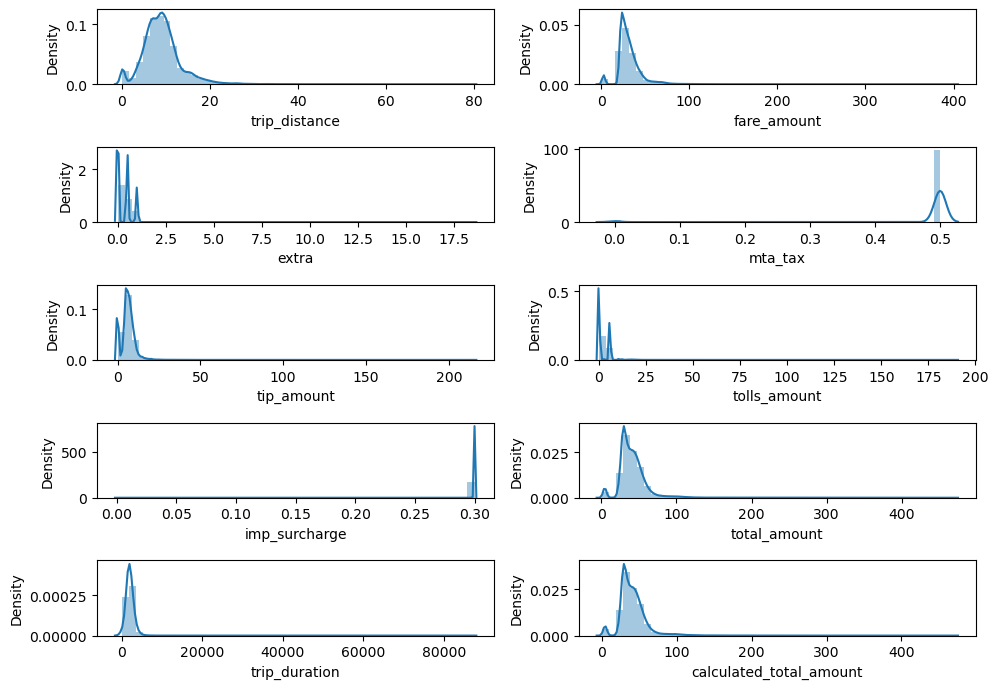

In [12]:
num_cols = ['trip_distance', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'trip_duration','calculated_total_amount']

nrows = 5
ncols =2
iterator = 1

plt.figure(figsize=(10, 7))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined.loc[:, i])
    iterator = iterator+1

plt.tight_layout()
plt.show()

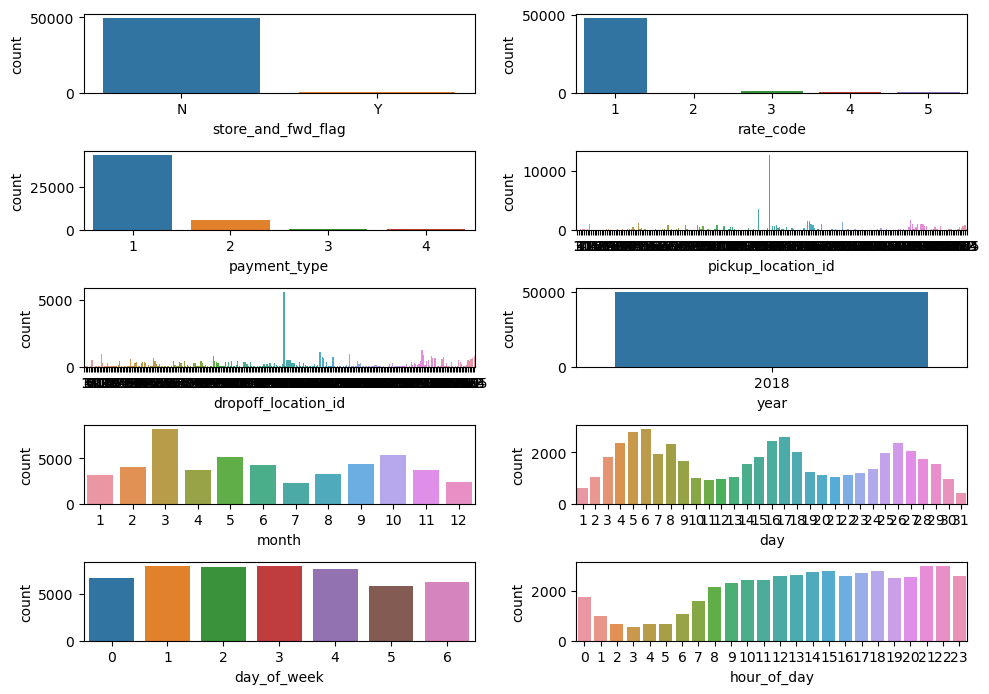

In [17]:
cat_cols = ['store_and_fwd_flag', 'rate_code', 
            'payment_type', 'pickup_location_id', 
            'dropoff_location_id', 'year',
            'month', 'day', 'day_of_week', 'hour_of_day']

nrows = 5
ncols =2
iterator = 1

plt.figure(figsize=(10, 7))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined.loc[:, i])
    iterator = iterator+1

plt.tight_layout()
plt.show()

### Bivariate Analysis

* Num vs Target:: Scatterplot
* Cat vs Target:: Boxplot

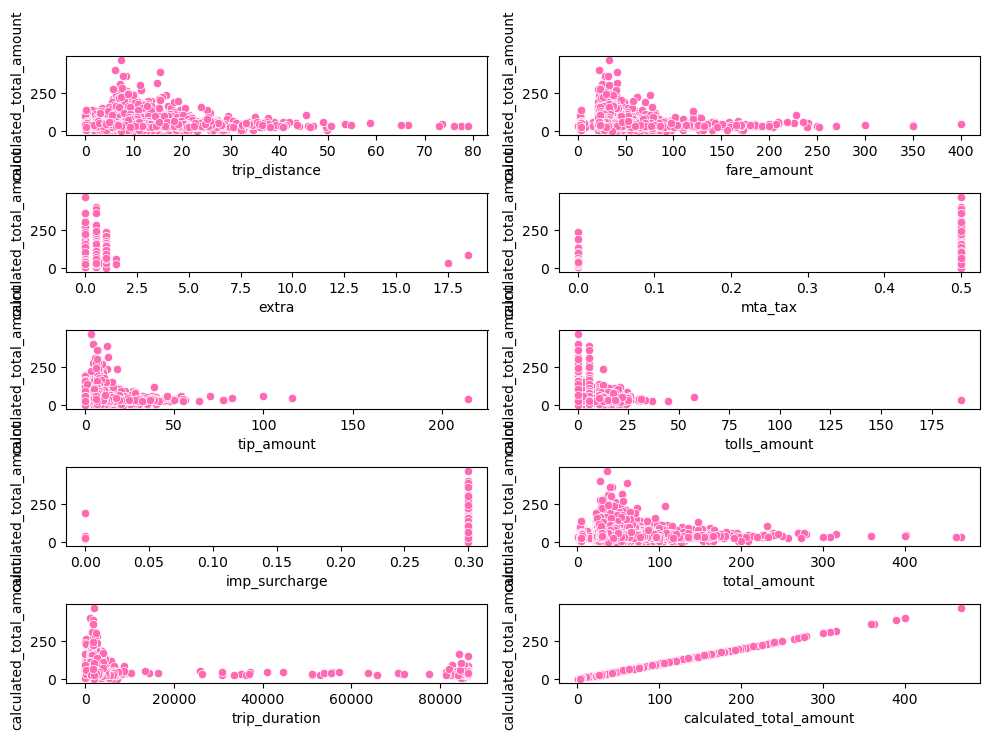

In [20]:
# Numerical Vars...
nrows = 5
ncols =2
iterator = 1

plt.figure(figsize=(10, 7))
for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(combined.loc[:, i], 
                    combined.calculated_total_amount, 
                   color = "hotpink")
    iterator = iterator+1

plt.tight_layout()
plt.show()

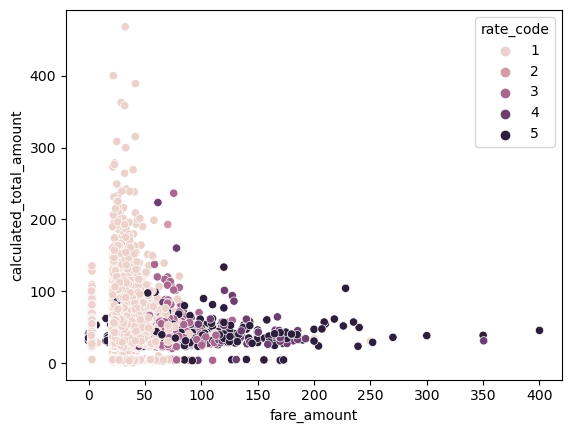

In [21]:
sns.scatterplot(x = "fare_amount", y = "calculated_total_amount",
               data = combined, hue = "rate_code")
plt.show()

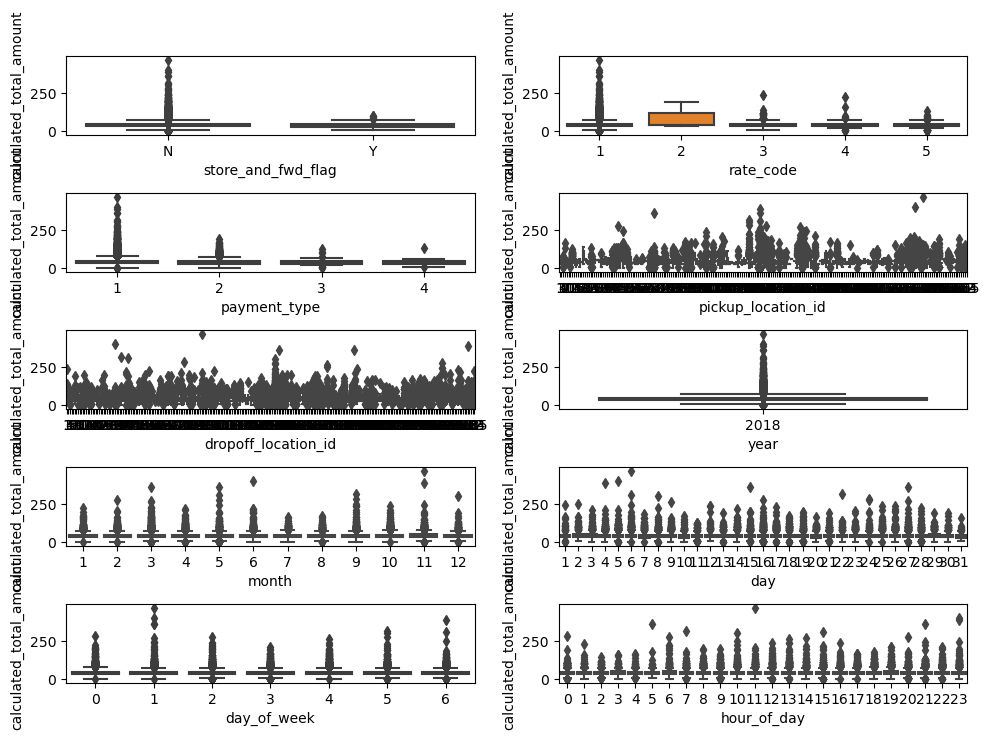

In [22]:
# Cat vs Number

nrows = 5
ncols =2
iterator = 1

plt.figure(figsize=(10, 7))
for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(combined.loc[:, i], 
                combined.calculated_total_amount)
    iterator = iterator+1

plt.tight_layout()
plt.show()

In [23]:
# Missing Values
combined.isnull().sum()[combined.isnull().sum()!=0]

calculated_total_amount    15000
dtype: int64

<AxesSubplot:xlabel='calculated_total_amount'>

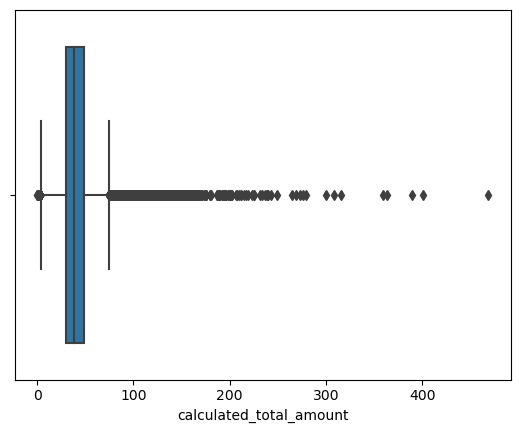

In [24]:
sns.boxplot(combined.calculated_total_amount)

### Feature Engineering

In [27]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,0.591944,24.30
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,0.660278,37.40
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,0.357222,30.36
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,0.718333,4.30
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,0.437500,23.80


In [112]:
# Trip Duration in Hours
combined["trip_duration"] = combined["trip_duration"]/3600

In [31]:
# Pick Up and Drop Location
combined.pickup_location_id.value_counts()[:5].index

Int64Index([138, 132, 230, 161, 162], dtype='int64')

In [52]:
localdf = pd.DataFrame(combined.pickup_location_id.astype(str)\
                       +"_"+combined.dropoff_location_id\
                       .astype(str), 
                       columns = ["Loc"])

In [114]:
combined["pick_&_drop"] = pd.DataFrame(combined.pickup_location_id.astype(str)\
                       +"_"+combined.dropoff_location_id\
                       .astype(str))

In [57]:
localdf.groupby("Loc")["tgt"].describe()

,count,mean,std,min,25%,50%,75%,max
Loc,,,,,,,,
100_1,28.0,46.302143,40.292126,3.80,30.9150,39.005,46.8825,236.56
100_100,15.0,38.564667,19.795360,23.80,27.5300,32.300,40.2600,99.96
100_102,1.0,42.060000,NaN,42.06,42.0600,42.060,42.0600,42.06
100_106,1.0,54.690000,NaN,54.69,54.6900,54.690,54.6900,54.69
100_112,4.0,38.100000,8.909646,25.30,35.3950,41.315,44.0200,44.47
...,...,...,...,...,...,...,...,...
97_7,1.0,29.160000,NaN,29.16,29.1600,29.160,29.1600,29.16
97_75,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97_82,1.0,45.070000,NaN,45.07,45.0700,45.070,45.0700,45.07


In [63]:
combined["magic1"] = combined.groupby("pick_&_drop")\
["calculated_total_amount"].transform("count")

combined["magic2"] = combined.groupby("pick_&_drop")\
["calculated_total_amount"].transform("mean")

combined["magic3"] = combined.groupby("pick_&_drop")\
["calculated_total_amount"].transform("median")

combined["magic4"] = combined.groupby("pick_&_drop")\
["calculated_total_amount"].transform("min")

combined["magic5"] = combined.groupby("pick_&_drop")\
["calculated_total_amount"].transform("max")

In [65]:
pd.set_option("display.max_columns", 50)
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,pick_&_drop,magic1,magic2,magic3,magic4,magic5
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,0.591944,24.30,262_138,63,39.290794,38.16,3.3,84.36
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,0.660278,37.40,263_236,11,36.600000,31.56,4.3,62.47
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,0.357222,30.36,138_230,593,41.341265,39.39,3.3,144.00
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,0.718333,4.30,186_138,104,40.143654,37.13,3.8,120.38
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,0.437500,23.80,162_87,31,41.366129,36.67,22.8,82.97


<AxesSubplot:xlabel='calculated_total_amount', ylabel='hour_of_day'>

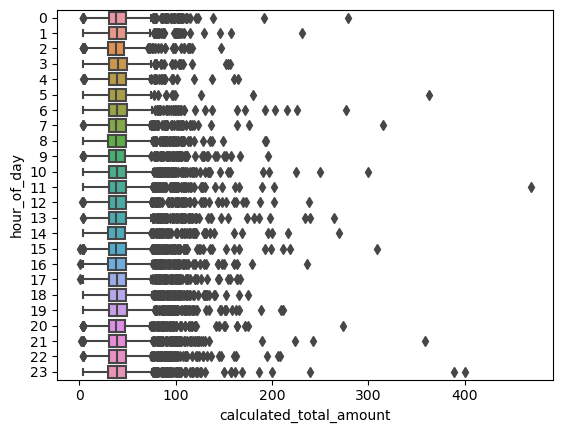

In [70]:
# Hour of the Day
sns.boxplot(y=combined.hour_of_day, 
            x=combined.calculated_total_amount, orient = "h")

# Busy Hours: 5,7,10,11,13,14,15,19,20,21,23

In [115]:
# Busy Hour...
busy = [0, 5,7,10,11,13,14,15,19,20,21,23]

def imbusy(x):
    if x in busy:
        return("Peak_Hour")
    else:
        return("Ease_Hour")

In [117]:
combined["magic6"] = combined.hour_of_day.apply(imbusy)

<AxesSubplot:xlabel='magic6', ylabel='calculated_total_amount'>

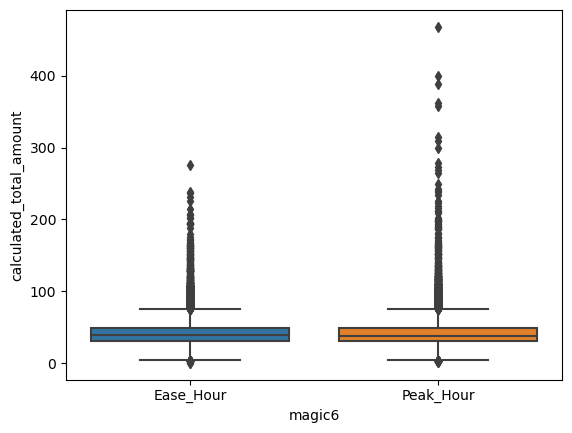

In [76]:
sns.boxplot(combined.magic6, combined.calculated_total_amount)

In [77]:
zones = pd.read_csv("C:/Users/IT/Downloads/taxi+_zone_lookup.csv")

In [86]:
zones.head(1)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR


In [79]:
pickup_zones = combined.pickup_location_id.unique()

In [87]:
for i in zones.LocationID:
    if i in pickup_zones:
        print(zones.Zone)
    else:
        print("No Zone")

0               Newark Airport
1                  Jamaica Bay
2      Allerton/Pelham Gardens
3                Alphabet City
4                Arden Heights
                ...           
260         World Trade Center
261             Yorkville East
262             Yorkville West
263                         NV
264                        NaN
Name: Zone, Length: 265, dtype: object
No Zone
0               Newark Airport
1                  Jamaica Bay
2      Allerton/Pelham Gardens
3                Alphabet City
4                Arden Heights
                ...           
260         World Trade Center
261             Yorkville East
262             Yorkville West
263                         NV
264                        NaN
Name: Zone, Length: 265, dtype: object
0               Newark Airport
1                  Jamaica Bay
2      Allerton/Pelham Gardens
3                Alphabet City
4                Arden Heights
                ...           
260         World Trade Center
261            

In [88]:
combined.head()

,trip_distance,rate_code,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,imp_surcharge,total_amount,pickup_location_id,dropoff_location_id,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount,pick_&_drop,magic1,magic2,magic3,magic4,magic5,magic6
0,9.01,1,N,1,26.0,0.0,0.5,8.14,5.76,0.3,40.70,262,138,2018,3,7,2,6,0.591944,24.30,262_138,63,39.290794,38.16,3.3,84.36,Ease_Hour
1,0.20,1,N,1,3.0,0.0,0.5,0.75,0.00,0.3,4.55,263,236,2018,2,25,6,10,0.660278,37.40,263_236,11,36.600000,31.56,4.3,62.47,Peak_Hour
2,9.65,1,N,1,41.5,0.0,0.5,9.61,5.76,0.3,57.67,138,230,2018,1,29,0,8,0.357222,30.36,138_230,593,41.341265,39.39,3.3,144.00,Ease_Hour
3,9.50,1,N,1,30.0,0.5,0.5,9.25,5.76,0.3,46.31,186,138,2018,9,25,1,20,0.718333,4.30,186_138,104,40.143654,37.13,3.8,120.38,Peak_Hour
4,5.80,1,N,1,21.5,0.5,0.5,4.56,0.00,0.3,27.36,162,87,2018,8,20,0,21,0.437500,23.80,162_87,31,41.366129,36.67,22.8,82.97,Peak_Hour


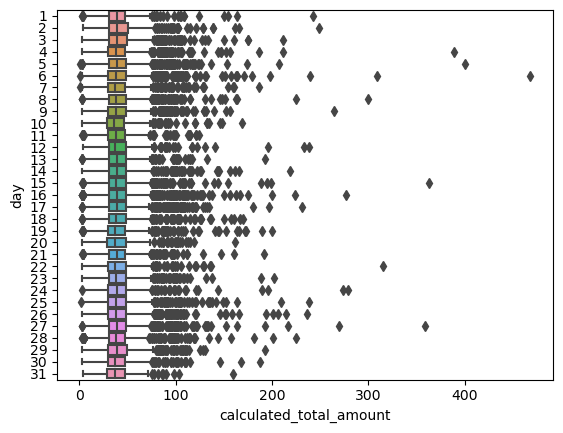

In [89]:
sns.boxplot(y = combined.day, 
            x = combined.calculated_total_amount, 
           orient = "h")
plt.show()

In [118]:
busy_days = [4, 5, 6, 8, 15, 16, 22, 24, 27]

def busy(x):
    if x in busy_days:
        return("Busy_Days")
    else:
        return("Lean_Days")

In [119]:
combined["magic7"] = combined.day.apply(busy)

<AxesSubplot:xlabel='magic7', ylabel='calculated_total_amount'>

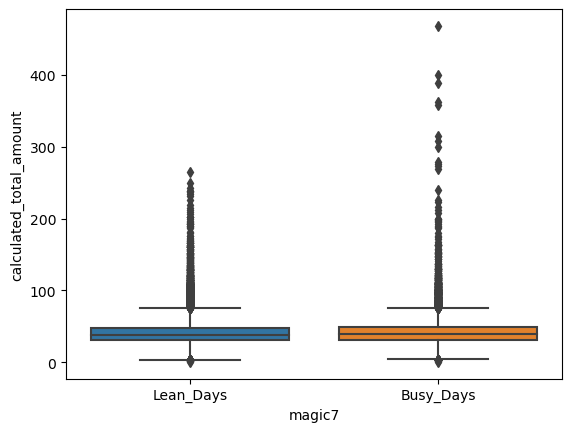

In [93]:
sns.boxplot(combined.magic7, combined.calculated_total_amount)

In [120]:
# Day wise avg Fare

combined.groupby("day")["calculated_total_amount"].describe()

combined["magic8"] = combined.groupby("day")\
["calculated_total_amount"].transform("count")

combined["magic9"] = combined.groupby("day")\
["calculated_total_amount"].transform("mean")

combined["magic10"] = combined.groupby("day")\
["calculated_total_amount"].transform("median")

combined["magic11"] = combined.groupby("day")\
["calculated_total_amount"].transform("min")

combined["magic12"] = combined.groupby("day")\
["calculated_total_amount"].transform("max")

In [121]:
combined.groupby("month")["calculated_total_amount"].describe()

combined["magic13"] = combined.groupby("month")\
["calculated_total_amount"].transform("count")

combined["magic14"] = combined.groupby("month")\
["calculated_total_amount"].transform("mean")

combined["magic15"] = combined.groupby("month")\
["calculated_total_amount"].transform("median")

combined["magic16"] = combined.groupby("month")\
["calculated_total_amount"].transform("min")

combined["magic17"] = combined.groupby("month")\
["calculated_total_amount"].transform("max")

In [100]:
combined.drop(['pickup_location_id', 'dropoff_location_id',
              'year', 'month', 'day', 
              'hour_of_day', 'pick_&_drop'], axis = 1, 
             inplace = True)

In [122]:
combined["magic18"] = combined["trip_distance"]/combined['trip_duration']

In [126]:
# Split the Data back in train and test
newtrain = combined.loc[0:train.shape[0]-1, ]
newtest = combined.loc[train.shape[0]:, ]

In [129]:
newtest.drop("calculated_total_amount",axis =1, inplace = True)

In [132]:
# Apply Mgic 1 to 5

newtrain.groupby("pick_&_drop")\
["calculated_total_amount"].describe()

newtrain["magic1"] = newtrain.groupby("pick_&_drop")\
["calculated_total_amount"].transform("count")

newtrain["magic2"] = newtrain.groupby("pick_&_drop")\
["calculated_total_amount"].transform("mean")

newtrain["magic3"] = newtrain.groupby("pick_&_drop")\
["calculated_total_amount"].transform("median")

newtrain["magic4"] = newtrain.groupby("pick_&_drop")\
["calculated_total_amount"].transform("min")

newtrain["magic5"] = newtrain.groupby("pick_&_drop")\
["calculated_total_amount"].transform("max")

In [154]:
mapped = newtrain.groupby("pick_&_drop")\
["calculated_total_amount"].\
apply(lambda x:np.round(x.median(),2)).to_dict()

In [155]:
newtest["magic3"] = newtest["pick_&_drop"].map(mapped)

In [165]:
newtrain.columns

Index(['trip_distance', 'rate_code', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'imp_surcharge', 'total_amount', 'pickup_location_id',
       'dropoff_location_id', 'year', 'month', 'day', 'day_of_week',
       'hour_of_day', 'trip_duration', 'calculated_total_amount',
       'pick_&_drop', 'magic6', 'magic7', 'magic8', 'magic9', 'magic10',
       'magic11', 'magic12', 'magic13', 'magic14', 'magic15', 'magic16',
       'magic17', 'magic18', 'magic1', 'magic2', 'magic3', 'magic4', 'magic5'],
      dtype='object')

In [166]:
newtrain.drop(['pickup_location_id',
       'dropoff_location_id', 'year', 
               'month', 'day', 'day_of_week',
       'hour_of_day', 'magic1', 'magic2',
               'magic3', 'magic4', 'magic5','pick_&_drop'], 
              axis = 1, inplace = True)


newtest.drop(['pickup_location_id',
       'dropoff_location_id', 'year', 
               'month', 'day', 'day_of_week',
       'hour_of_day', 'magic1', 'magic2',
               'magic3', 'pick_&_drop'], 
              axis = 1, inplace = True)

#### Statistical Testing

In [178]:
num_cols = ['trip_distance','fare_amount','extra',
            'mta_tax','tip_amount','tolls_amount',
            'imp_surcharge','total_amount','trip_duration',
            'magic8', 'magic9','magic10', 'magic11', 
            'magic12', 'magic13', 'magic14', 'magic15',
            'magic16', 'magic17', 'magic18']

In [179]:
import scipy.stats as stats

imp_feats = []
for i in num_cols:
    teststats, pvalue = stats.ttest_ind(newtrain.loc[:, i],
                                       newtrain.calculated_total_amount)
    if pvalue<0.05:
        imp_feats.append(i)

In [184]:
# rate code and payment Type

import statsmodels.formula.api as sfa

from statsmodels.stats.anova import anova_lm

model = sfa.ols("calculated_total_amount~payment_type", 
                data = newtrain).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
payment_type,1.0,2.106604e+04,21066.038965,57.434437,3.580489e-14
Residual,34998.0,1.283671e+07,366.784109,NaN,NaN


In [185]:
dummytrain= pd.get_dummies(newtrain, drop_first = True)
dummytest= pd.get_dummies(newtest, drop_first = True)

In [187]:
dummytrain.shape, dummytest.shape

((35000, 26), (15000, 25))

In [188]:
dummytrain.columns

Index(['trip_distance', 'rate_code', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'imp_surcharge',
       'total_amount', 'trip_duration', 'calculated_total_amount', 'magic8',
       'magic9', 'magic10', 'magic11', 'magic12', 'magic13', 'magic14',
       'magic15', 'magic16', 'magic17', 'magic18', 'store_and_fwd_flag_Y',
       'magic6_Peak_Hour', 'magic7_Lean_Days'],
      dtype='object')

In [191]:
# Magic14, total_amount and magic 9
dummytrain.drop(["total_amount", "magic14", "magic9"], axis = 1,
               inplace = True)

dummytest.drop(["total_amount", "magic14", "magic9"], axis = 1,
               inplace = True)

### Model Building

In [192]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

kfold = KFold(n_splits= 5, shuffle = True, random_state = 42)

X = dummytrain.drop("calculated_total_amount", axis = 1)
y = dummytrain.calculated_total_amount

In [197]:
lr = LinearRegression()
gbm = GradientBoostingRegressor()
pred = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(gbm.fit(xtrain, ytrain).predict(dummytest)) 

In [196]:
# Linear Regression
final = pd.DataFrame(pred).T.mean(axis = 1)


In [198]:
# GBM
final_gbm = pd.DataFrame(pred).T.mean(axis = 1)

In [205]:
submission["calculated_total_amount"] = final_gbm

In [208]:
submission.to_csv("GBM_Taxi.csv", index=False) # 19.18

In [207]:
cd

C:\Users\IT
